# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [53]:
#1
#--------------------------------------------
#print(f'--[分組(group by)]---')
#grp = app_train.groupby(['CNT_CHILDREN'])
#print(grp.size())
#print(grp.size().index)
#print(grp.size().values)
#print(app_train['CNT_CHILDREN'].value_counts())

#--------------------------------------------
sub_0 = app_train[app_train['CNT_CHILDREN'] == 0]
sub_1_2 = app_train[(app_train['CNT_CHILDREN'] >= 1) & (app_train['CNT_CHILDREN'] <= 2)]
sub_3_4 = app_train[(app_train['CNT_CHILDREN'] >= 3) & (app_train['CNT_CHILDREN'] <= 4)]
sub_5 = app_train[app_train['CNT_CHILDREN'] >= 5]
print(f'--[分組(count by filter)]---')
print(f'0:\t{len(sub_0)}')
print(f'1~2:\t{len(sub_1_2)}')
print(f'3~4:\t{len(sub_3_4)}')
print(f'5+:\t{len(sub_5)}')

#--------------------------------------------
print('')
print(f'--[分組(by cutrule)]---')
min = app_train['CNT_CHILDREN'].min()
max = app_train['CNT_CHILDREN'].max()

cut_rule = [min,1,3,5,max+1] #上下限
#app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, right=False, labels=['0','1~2','3~4','5+'])
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, right=False)
app_train['CNT_CHILDREN_GROUP'].value_counts()

#print(app_train['CNT_CHILDREN_GROUP'].describe())

--[分組(count by filter)]---
0:	215371
1~2:	87868
3~4:	4146
5+:	126

--[分組(by cutrule)]---


[0, 1)     215371
[1, 3)      87868
[3, 5)       4146
[5, 20)       126
Name: CNT_CHILDREN_GROUP, dtype: int64

[pandas cut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)

In [54]:
#2-1
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
[0, 1)              0         166747.010980
                    1         160804.210548
[1, 3)              0         174590.584401
                    1         176115.362720
[3, 5)              0         175057.123091
                    1         159848.673123
[5, 20)             0         164170.636364
                    1         192937.500000
Name: AMT_INCOME_TOTAL, dtype: float64

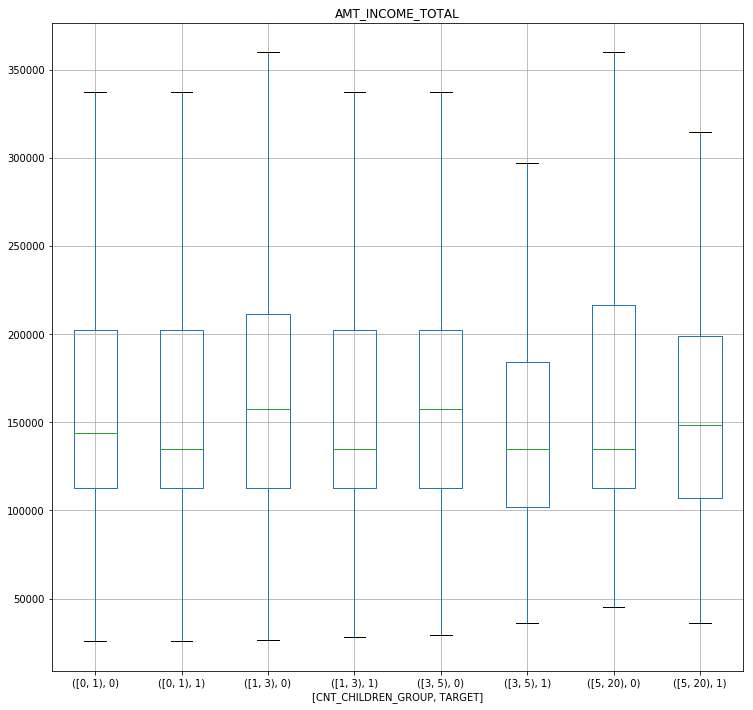

In [55]:
#2-2
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [58]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


## Day 7 - Z轉換
## $ y = \frac{(x - mean(x))}{std(x)} $